In [117]:
# rodar: import Pkg; Pkg.add("CSV"); Pkg.add("DataFrames"); Pkg.add("Gadfly"); para instalar antes

using CSV
using DataFrames
using Gadfly
# using CategoricalArrays
set_default_plot_size(21cm, 12cm)

In [118]:
df = DataFrame(CSV.File("results.tsv", header=1, delim="\t"))
first(df, 10)

10×13 DataFrame
 Row │ Algorithm       Image         Size   Threads  Time       Stddev    Cloc ⋯
     │ String          String        Int64  Int64    Float64    Float64   Stri ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ mandelbrot_seq  elephant.log     16        1   0.001221  4.25e-5   0.87 ⋯
   2 │ mandelbrot_seq  elephant.log     32        1   0.00255   0.000221  2.16
   3 │ mandelbrot_seq  elephant.log     64        1   0.009084  0.000776  8.7
   4 │ mandelbrot_seq  elephant.log    128        1   0.02641   0.000716  26.0
   5 │ mandelbrot_seq  elephant.log    256        1   0.09824   0.00904   97.7 ⋯
   6 │ mandelbrot_seq  elephant.log    512        1   0.4908    0.0506    490.
   7 │ mandelbrot_seq  elephant.log   1024        1   1.4741    0.0414    1,47
   8 │ mandelbrot_seq  elephant.log   2048        1   5.5715    0.0922    5,57
   9 │ mandelbrot_seq  elephant.log   4096        1  21.435     0.104     21,4 ⋯
  10 │ mandelbrot_seq  elephant.log   8192        1  84.961     0.129     84,9
                                                               7 columns omitted

In [119]:
describe(df)

13×7 DataFrame
 Row │ variable      mean       min             median     max                 ⋯
     │ Symbol        Union…     Any             Union…     Any                 ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ Algorithm                mandelbrot_omp             mandelbrot_seq      ⋯
   2 │ Image                    elephant.log               triple_spiral.log
   3 │ Size          1636.8     16              384.0      8192
   4 │ Threads       9.76923    1               4.0        32
   5 │ Time          2.68384    0.0005556       0.005314   103.164             ⋯
   6 │ Stddev        0.0139304  7.69e-6         0.0002905  0.237
   7 │ Clock                    0.27                       996.22
   8 │ CPUs          4.18531    0.4             1.636      28.868
   9 │ Cycles                   1,025,999,471              98,973,475,178      ⋯
  10 │ Instructions             1,000,045                  999,835
  11 │ IO            0.0        0               0.0        0
  12 │ MemAlloc      0.333333   0               0.0        1
  13 │ O3            0.333333   0               0.0        1                   ⋯
                                                               2 columns omitted

In [120]:
# Displaying column types
eltype.(eachcol(df))

13-element Vector{DataType}:
 String
 String
 Int64
 Int64
 Float64
 Float64
 String
 Float64
 String
 String
 Int64
 Int64
 Int64

In [121]:
# nao funciona nessa versao :(
categorical!(df, :MemAlloc)

LoadError: UndefVarError: categorical! not defined

In [122]:
# Filtrando observações com a flag O3
df = filter(row -> row.O3 == 0, df)
first(df, 5)

5×13 DataFrame
 Row │ Algorithm       Image         Size   Threads  Time      Stddev    Clock ⋯
     │ String          String        Int64  Int64    Float64   Float64   Strin ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ mandelbrot_seq  elephant.log     16        1  0.001221  4.25e-5   0.87  ⋯
   2 │ mandelbrot_seq  elephant.log     32        1  0.00255   0.000221  2.16
   3 │ mandelbrot_seq  elephant.log     64        1  0.009084  0.000776  8.7
   4 │ mandelbrot_seq  elephant.log    128        1  0.02641   0.000716  26.04
   5 │ mandelbrot_seq  elephant.log    256        1  0.09824   0.00904   97.76 ⋯
                                                               7 columns omitted

In [123]:
threads_values = unique(df.Threads)

6-element Vector{Int64}:
  1
  2
  4
  8
 16
 32

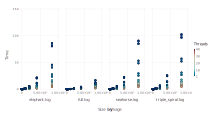

In [124]:
plot(df, xgroup=:Image, 
    x=:Size, 
    y=:Time, 
    color=:Threads, 
    Geom.subplot_grid(Geom.point))

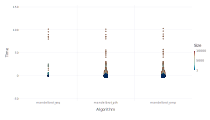

In [125]:
plot(df, 
    x=:Algorithm, 
    y=:Time, 
    color=:Size, 
    size=:Threads, 
    Geom.point)

In [126]:
df_full = filter(row -> row.Image == "full.log", df)
df_elephant = filter(row -> row.Image == "elephant.log", df)
df_seahorse = filter(row -> row.Image == "seahorse.log", df)
df_triple_spiral = filter(row -> row.Image == "triple_spiral.log", df);

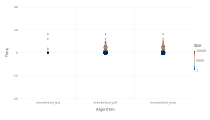

In [127]:
plot(df_full, 
    x=:Algorithm, 
    y=:Time, 
    color=:Size, 
    size=:Threads, 
    Geom.point)

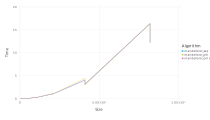

In [128]:
df_full_1thread = filter(row -> row.Threads == 1, df_full)
plot(df_full_1thread, x=:Size, y=:Time, color=:Algorithm, Geom.line)

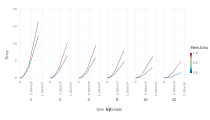

In [129]:
plot(df_full, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line))

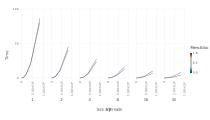

In [130]:
plot(df_elephant, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line))

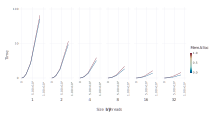

In [131]:
plot(df_seahorse, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line))

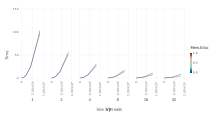

In [132]:
plot(df_triple_spiral, 
    xgroup=:Threads, 
    x=:Size, 
    y=:Time, 
    color=:MemAlloc, 
    Geom.subplot_grid(Geom.line))